In [1]:
!pip install --upgrade pip
!pip install --upgrade scikit-learn==0.23.0

Requirement already up-to-date: pip in /usr/local/lib/python3.6/dist-packages (20.1.1)
Requirement already up-to-date: scikit-learn==0.23.0 in /usr/local/lib/python3.6/dist-packages (0.23.0)


In [2]:
import numpy as np
import matplotlib
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.multiclass import OneVsRestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import csv
%matplotlib inline

Импортируем датасет MNIST.

In [3]:
from keras.datasets import mnist
(X_train, y_train), (X_pred, y_pred) = mnist.load_data()

Using TensorFlow backend.


Объем тренировочного набора данных:

In [4]:
len(X_train)

60000

Посмотрим, что из себя представляет, например, нулевой объект.

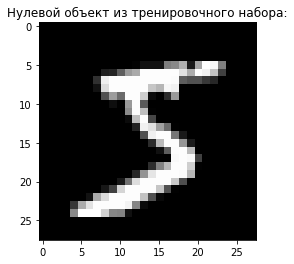

In [5]:
plt.title("Нулевой объект из тренировочного набора:")
plt.imshow(X_train[0], cmap="gray")

Отклик нулевого объекта из тренировочного набора:

In [6]:
y_train[0]

5

In [7]:
dim = 784 # 28*28 
X_train = X_train.reshape(len(X_train), dim)


In [8]:
from sklearn.decomposition import PCA

pca1 = PCA(n_components=784, svd_solver='full')
modelPCA1 = pca1.fit(X_train) 

Доля объясненной дисперсии (При 44 компонентах доля оъясненной дисперсии будет больше 0.8)

In [9]:
explained_variance = np.round(np.cumsum(pca1.explained_variance_ratio_),3)
len(explained_variance[explained_variance < 0.8])

43

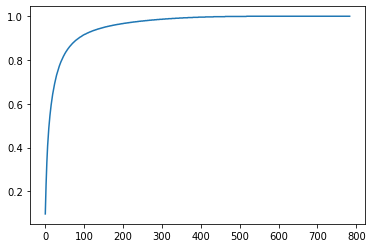

In [10]:
plt.plot(np.arange(784), explained_variance, ls = '-')

Находим счеты для количества компонент, при котором доля объясненной дисперсии будет больше 0.8

In [11]:
pca = PCA(n_components=44, svd_solver='full')
modelPCA = pca.fit(X_train) 
X_train = modelPCA.transform(X_train)

Разделение на тестовую и обучающие выборки

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3, random_state=45)

Выборочное среднее для 0 колонки тренировочных данных

In [13]:
sum(X_train[:,0]) / len(X_train) 

0.15659943217812164

Обучаем модель:

In [14]:
tree = RandomForestClassifier(criterion='gini', min_samples_leaf=10, max_depth=20, n_estimators=10, random_state=45)
clf1 = OneVsRestClassifier(tree).fit(X_train, y_train)

Примените полученное ранее преобразование метода главных компонент к тестовым данным

In [15]:
y_pred = clf1.predict(X_test)

Выполняем оценку:

In [16]:
CM = confusion_matrix(y_test, y_pred)

Число верно классифицирвоанных объектов класс 5

In [17]:
CM[5][5]

1401

Обучаем модель регрессии

In [18]:
reg = LogisticRegression(solver='lbfgs', random_state=45)
clf2 = OneVsRestClassifier(reg).fit(X_train, y_train)

In [19]:
y_pred = clf2.predict(X_test)

In [20]:
CM = confusion_matrix(y_test, y_pred)
CM[1][1]

1909

In [21]:
reg = DecisionTreeClassifier(criterion='gini',min_samples_leaf=10,max_depth=20,random_state=45)
clf3 = OneVsRestClassifier(reg).fit(X_train, y_train)

In [22]:
y_pred = clf3.predict(X_test)

In [23]:
CM = confusion_matrix(y_test, y_pred)
CM[4][4]

1403

In [24]:
file = open('pred_for_task.csv', 'r')
reader = csv.reader(file)
next(reader)
all = []
for mas in reader:
  mas = [int(el) for el in mas[2:786]]
  all.append(mas)
all = np.array(all)
print(all)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [25]:
test = modelPCA.transform(all)

In [26]:
y = clf1.predict(test)
y_pred = clf1.predict_proba(test)
np.max(y_pred[4])

0.6433415149478461

In [27]:
y = clf2.predict(test)
y_pred = clf2.predict_proba(test)
np.max(y_pred[9])

0.8020918255843941

In [28]:
y = clf3.predict(test)
y_pred = clf3.predict_proba(test)
np.max(y_pred[0])

/usr/local/lib/python3.6/dist-packages/sklearn/multiclass.py:382: RuntimeWarning: invalid value encountered in true_divide
  Y /= np.sum(Y, axis=1)[:, np.newaxis]


0.8320751653855792